In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "car.data"
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, names=columns)
print(df)

     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]


In [4]:
# drop if data have duplicates
df = df.drop_duplicates()

# check if data have missing values
missing_values = df.isna().sum()
print(missing_values)

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


no missing values

In [5]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


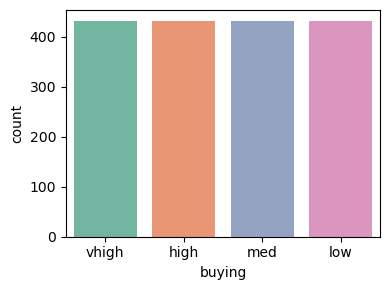

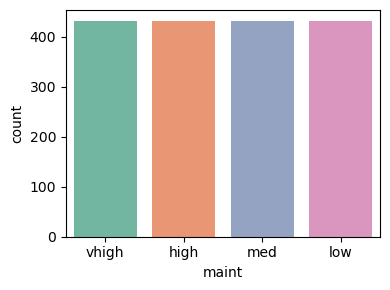

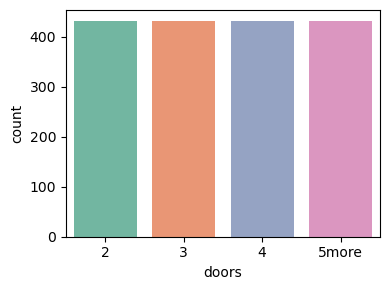

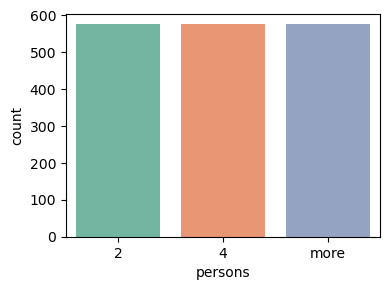

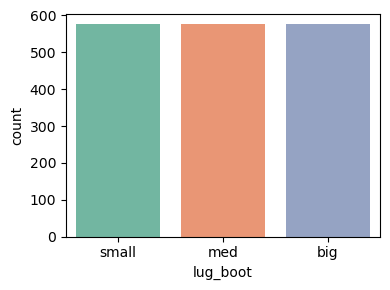

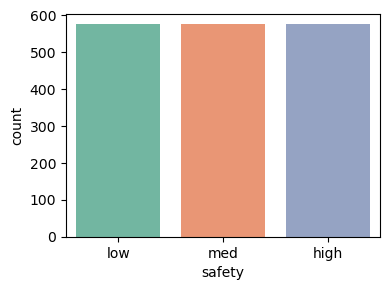

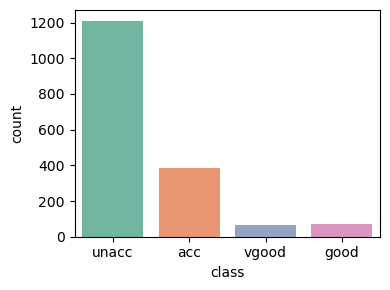

In [15]:
import seaborn as sns

# plot every column count plot
for col in columns:
    plt.figure(figsize=(4, 3))
    sns.countplot(x = df[col], data = df, palette = 'Set2')
    plt.tight_layout()
    plt.show()


This indicates a consistency in how categorical data is distributed across different attributes.

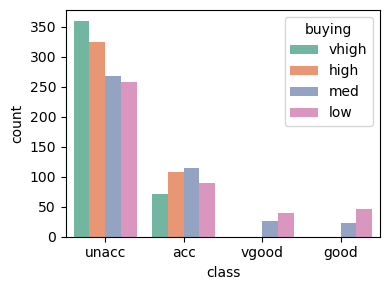

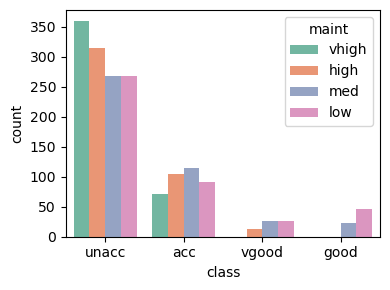

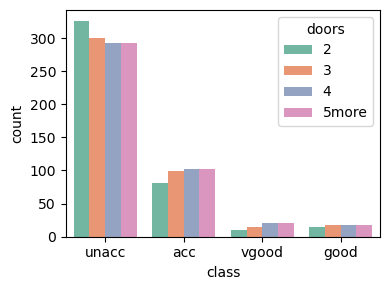

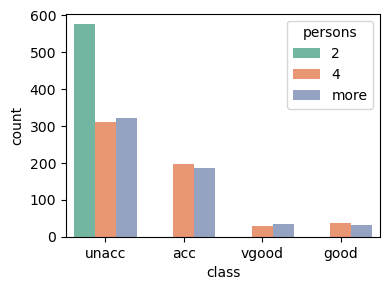

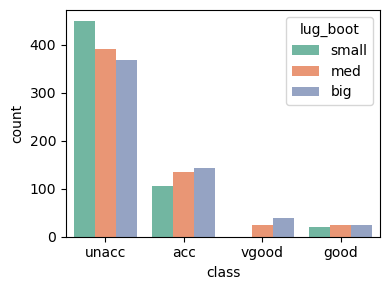

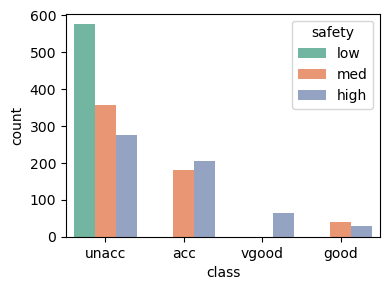

In [8]:
for col in columns[:len(columns)-1]:
    plt.figure(figsize=(4, 3))
    sns.countplot(x="class", hue=df[col], data=df, palette = 'Set2')
    plt.tight_layout()
    plt.show()

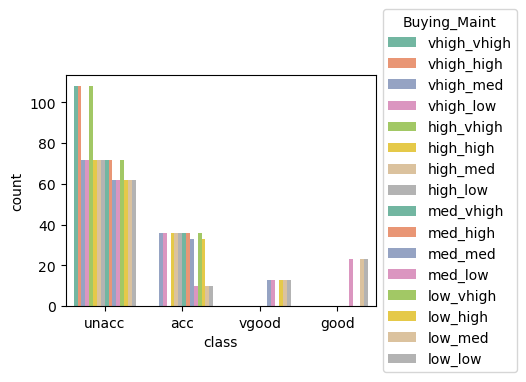

,buying,maint,doors,persons,lug_boot,safety,class,buying_maint
count,1728,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4,16
top,vhigh,vhigh,2,2,small,low,unacc,vhigh_vhigh
freq,432,432,432,576,576,576,1210,108


In [201]:
#combine buying and maint vs class
df['buying_maint'] = df['buying'] + "_" + df['maint']
plt.figure(figsize=(4, 3))
buying_maint = sns.countplot(x="class", hue=df['buying_maint'], data=df, palette = 'Set2')
buying_maint.legend(title='Buying_Maint', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
df.describe()

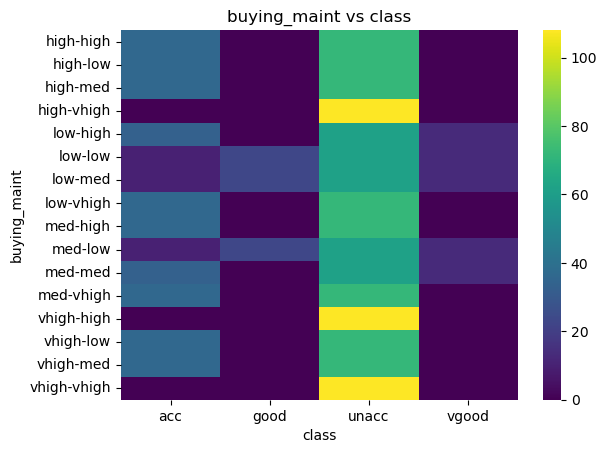

In [182]:
cross = pd.crosstab(index=[df['buying'], df['maint']], columns=df['class'])
sns.heatmap(cross, cmap='viridis')
plt.title('buying_maint vs class')
plt.ylabel('buying_maint')
plt.xlabel('class')
plt.show()

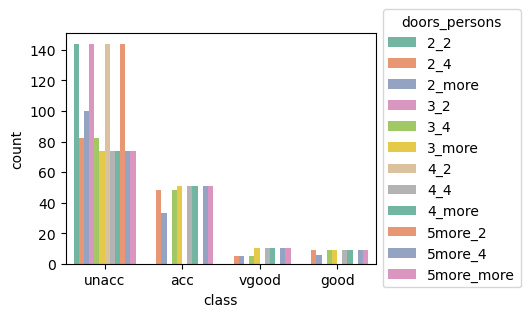

,buying,maint,doors,persons,lug_boot,safety,class,buying_maint,doors_persons
count,1728,1728,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4,16,12
top,vhigh,vhigh,2,2,small,low,unacc,vhigh_vhigh,2_2
freq,432,432,432,576,576,576,1210,108,144


In [202]:
df['doors_persons'] = df['doors'] + "_" + df['persons']
plt.figure(figsize=(4, 3))
doors_persons = sns.countplot(x="class", hue=df['doors_persons'], data=df, palette = 'Set2')
doors_persons.legend(title='doors_persons', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
df.describe()

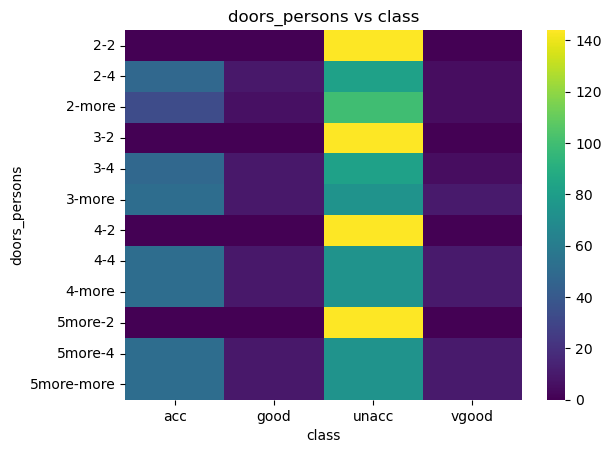

In [183]:
cross_d_p = pd.crosstab(index=[df['doors'], df['persons']], columns=df['class'])
sns.heatmap(cross_d_p, cmap='viridis')
plt.title('doors_persons vs class')
plt.ylabel('doors_persons')
plt.xlabel('class')
plt.show()

The number of doors seems to have little impact on car ratings

In [9]:
# find unique values of each column
for col in columns:
    print(df[col].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


We can see that all labels are related in size or order. Therefore we use label encoder

In [253]:
# one-hot-encoder
X_ohe = pd.get_dummies(df.drop('class', axis = 1))
class_mapping = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}
y_ohe = df['class'].map(class_mapping)

X_ohe, y_ohe

(      buying_high  buying_low  buying_med  buying_vhigh  maint_high  \
 0           False       False       False          True       False   
 1           False       False       False          True       False   
 2           False       False       False          True       False   
 3           False       False       False          True       False   
 4           False       False       False          True       False   
 ...           ...         ...         ...           ...         ...   
 1723        False        True       False         False       False   
 1724        False        True       False         False       False   
 1725        False        True       False         False       False   
 1726        False        True       False         False       False   
 1727        False        True       False         False       False   
 
       maint_low  maint_med  maint_vhigh  doors_2  doors_3  ...  doors_5more  \
 0         False      False         True     True    F

In [262]:
# label encoder
df['buying'] = df['buying'].replace({'vhigh': 3, 'high': 2, 'med': 1, 'low': 0})
df['maint'] = df['maint'].replace({'vhigh': 3, 'high': 2, 'med': 1, 'low': 0})
df['doors'] = df['doors'].replace({'2': 0, '3': 1, '4': 2, '5more': 3})
df['persons'] = df['persons'].replace({'2': 0, '4': 1,'more': 2})
df['lug_boot'] = df['lug_boot'].replace({'small': 0,'med': 1, 'big': 2})
df['safety'] = df['safety'].replace({'low': 0, 'med': 1, 'high': 2})
df['class'] = df['class'].replace({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3})
for col in columns:
    print(df[col].unique())
df

df['doors_persons'] = df['doors']*df['persons']

X_le = df.drop('class', axis = 1)
y_le = df['class']

[3 2 1 0]
[3 2 1 0]
[0 1 2 3]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 3 2]


In [205]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components  = 2)
pca.fit(X_ohe).transform(X_ohe)
var = pca.explained_variance_ratio_
np.cumsum(var)

array([0.10457516, 0.20915033])

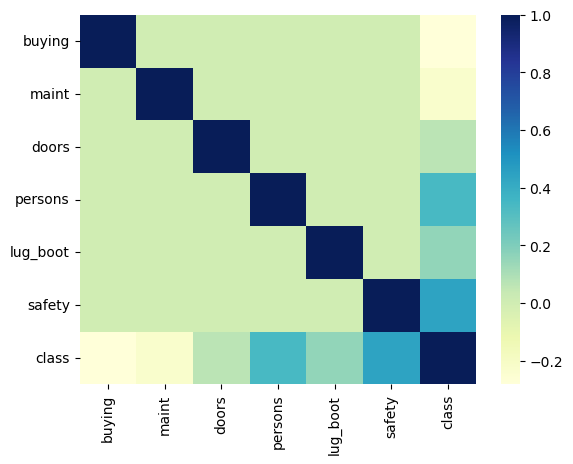

In [81]:
# correlation matrix

corr = df.corr()
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=False) 

Based on correlation matrix, indicates non-linear data.

In [260]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# X_le, y_le 

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_le, y_le, test_size=0.2, stratify=y_le)

# Create a pipeline
pipe = Pipeline([
    ('select', SelectKBest(chi2)),
    ('model', RandomForestClassifier(n_estimators = 100, random_state=42))
])

# Create parameter grid
param_grid = {
    'select__k': list(range(1, X_train.shape[1] + 1))  # Trying every possible value of k
}

# Grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best number of features
print("Best number of features:", grid_search.best_params_['select__k'])
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# selector = fs.SelectKBest(fs.chi2, k = 18)
# df_new = selector.fit_transform(X,y)

# selected_features = selector.get_support(indices = True)
# feature_names = [X.columns[i] for i in selected_features]

# print(feature_names)

Best number of features: 6
Best cross-validation score: 0.98


In [259]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline

#X_ohe, y_ohe

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_ohe, test_size=0.2, stratify=y_ohe)

# Create a pipeline
pipe = Pipeline([
    ('select', SelectKBest(chi2)),
    ('model', LogisticRegression(random_state=42))
])

# Create parameter grid
param_grid = {
    'select__k': list(range(1, X_train.shape[1] + 1))  # Trying every possible value of k
}

# Grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best number of features
print("Best number of features:", grid_search.best_params_['select__k'])
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best number of features: 17
Best cross-validation score: 0.91


In [255]:
# feature selection (UFS)
# from sklearn import feature_selection as fs

# selector = fs.SelectKBest(fs.chi2, k = 19)
# df_new = selector.fit_transform(X_ohe,y_ohe)

# selected_features = selector.get_support(indices = True)
# feature_names = [X_ohe.columns[i] for i in selected_features]

# print(feature_names)

# drop feature 'doors'
X_ohe = X_ohe.drop('doors_3', axis = 1)
X_ohe = X_ohe.drop('lug_boot_med', axis = 1)

Accuracy: 0.9017341040462428
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       242
           1       0.75      0.87      0.81        77
           2       0.75      0.43      0.55        14
           3       0.75      0.92      0.83        13

    accuracy                           0.90       346
   macro avg       0.81      0.79      0.78       346
weighted avg       0.91      0.90      0.90       346



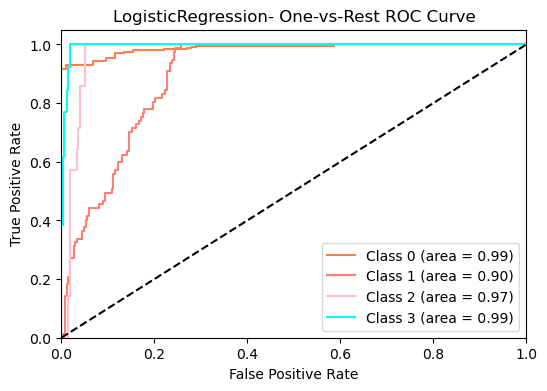

In [144]:
# logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_ohe, test_size = 0.2, stratify=y_ohe)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lg_model = LogisticRegression(max_iter=1000, random_state=42)
lg_model.fit(X_train_scaled, y_train)

lg_pred = lg_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, lg_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, lg_pred))

plot_roc_curves(X_train, y_train, X_test, y_test, LogisticRegression)

In [149]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf

y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

model = Sequential([
    Dense(16, activation='relu', input_dim=len(feature_names)),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')  # Using 4 because there are 4 class labels
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)


y_pred = model.predict(X_test)
ann_pred = y_pred.argmax(axis=1)

print(classification_report(y_test, ann_pred, target_names=class_mapping.keys()))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/50
111/111 [==============================] - 1s 3ms/step - loss: 1.0928 - accuracy: 0.5819 - val_loss: 0.8545 - val_accuracy: 0.7184
Epoch 2/50
111/111 [==============================] - 0s 1ms/step - loss: 0.7475 - accuracy: 0.7294 - val_loss: 0.6532 - val_accuracy: 0.7437
Epoch 3/50
111/111 [==============================] - 0s 1ms/step - loss: 0.5529 - accuracy: 0.7964 - val_loss: 0.4941 - val_accuracy: 0.8014
Epoch 4/50
111/111 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8552 - val_loss: 0.3948 - val_accuracy: 0.8592
Epoch 5/50
111/111 [==============================] - 0s 1ms/step - loss: 0.3526 - accuracy: 0.8724 - val_loss: 0.3432 - val_accuracy: 0.8628
Epoch 6/50
111/111 [==============================] - 0s 1ms/step - loss: 0.3030 - accuracy: 0.8851 - val_loss: 0.3008 - val_accuracy: 0.8700
Epoch 7/50
111/111 [==============================] - 0s 1ms/step - loss: 0.2660 - accuracy: 0.8959 - val_loss: 0.2683 - val_accuracy: 0.8845
Epoch 

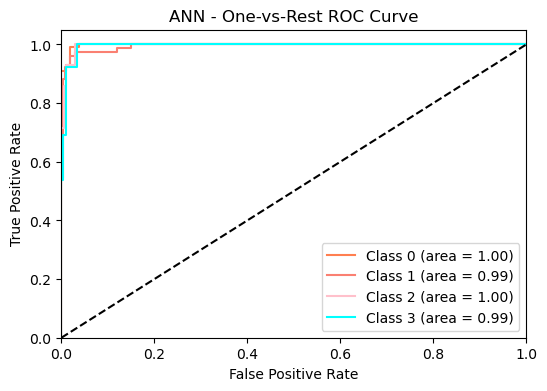

In [150]:
# plot ANN model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, roc_auc = {}, {}, {}
colors = ['coral', 'salmon', 'pink', 'cyan']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(6, 4))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN - One-vs-Rest ROC Curve')
plt.legend(loc="lower right")
plt.show()

Decision Tree Accuracy: 0.976878612716763
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       242
           1       0.95      0.95      0.95        77
           2       1.00      0.93      0.96        14
           3       1.00      0.85      0.92        13

    accuracy                           0.98       346
   macro avg       0.98      0.93      0.95       346
weighted avg       0.98      0.98      0.98       346



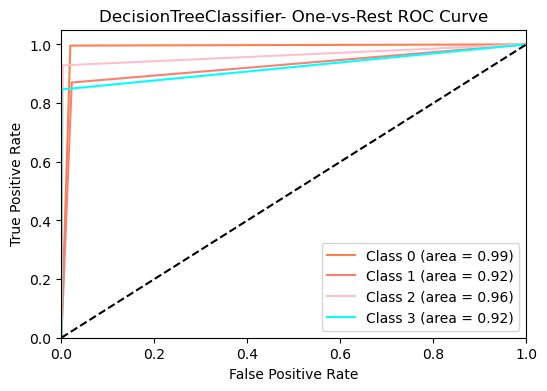

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_le, y_le, test_size = 0.2, stratify=y_le)

# create model
dt_model = DecisionTreeClassifier(random_state=42)

# train model
dt_model.fit(X_train, y_train)

# predict test data
dt_pred = dt_model.predict(X_test)

# accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))

plot_roc_curves(X_train, y_train, X_test, y_test, DecisionTreeClassifier)

Random Forest Accuracy: 0.9913294797687862
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       242
           1       0.99      0.97      0.98        77
           2       0.93      1.00      0.97        14
           3       1.00      0.92      0.96        13

    accuracy                           0.99       346
   macro avg       0.98      0.97      0.98       346
weighted avg       0.99      0.99      0.99       346



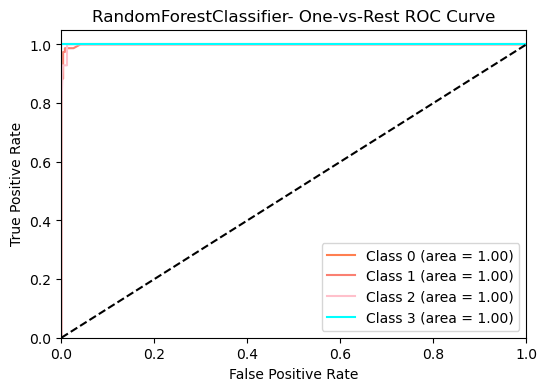

In [248]:
# random forest using features without doors
# best one 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error


X = X_le.drop('doors', axis = 1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

# create model
rf_model =  RandomForestClassifier(n_estimators = 100, random_state = 42)

# train model
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_train)

# predict test data
rf_pred = rf_model.predict(X_test)

# accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

plot_roc_curves(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators = 100)

Random Forest Accuracy: 0.976878612716763
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       242
           1       0.92      0.99      0.95        77
           2       1.00      0.71      0.83        14
           3       1.00      0.77      0.87        13

    accuracy                           0.98       346
   macro avg       0.98      0.87      0.91       346
weighted avg       0.98      0.98      0.98       346



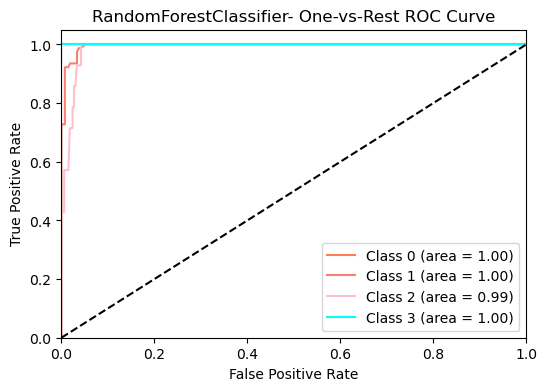

In [249]:
# random forest using all features
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error


X = X_le
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

# create model
rf_model =  RandomForestClassifier(n_estimators = 100, random_state = 42)

# train model
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_train)

# predict test data
rf_pred = rf_model.predict(X_test)

# accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

plot_roc_curves(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators = 100)

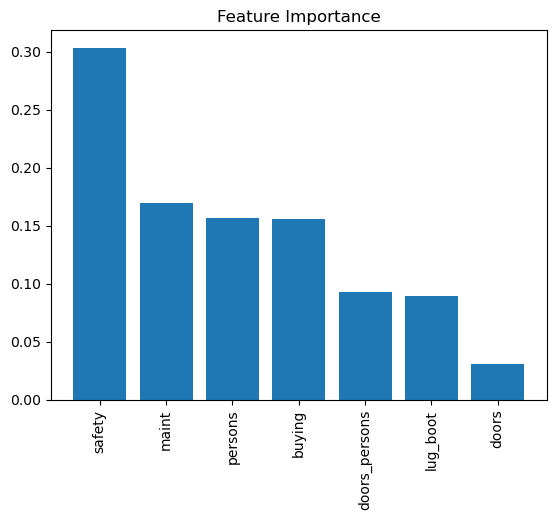

In [250]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

In [158]:
# use cross validation to check if overfitting
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validated scores:", scores)
print("Mean cross-validation score:", scores.mean())

train_accuracy = accuracy_score(y_train, y_pred)  
print("Training set accuracy:", train_accuracy)


Cross-validated scores: [0.97833935 0.97472924 0.99637681 0.95289855 0.98550725]
Mean cross-validation score: 0.9775702401506828
Training set accuracy: 1.0


In [133]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

def plot_roc_curves(X_train, y_train, X_test, y_test, classifier, **kwargs):
    y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
    y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
    n_classes = y_train_bin.shape[1]
    
    ovr_classifier = OneVsRestClassifier(classifier(**kwargs, random_state=42))
    ovr_classifier.fit(X_train, y_train_bin)
    
    
    y_prob = ovr_classifier.predict_proba(X_test)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    colors = ['coral', 'salmon', 'pink', 'cyan']
    
    for i in range(4):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plot roc curve
    plt.figure(figsize=(6, 4))
    for i in range(4):
        plt.plot(fpr[i], tpr[i], color=colors[i], label='Class {} (area = {:.2f})'.format(i, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    model_name = classifier.__name__
    plt.title(f'{model_name}- One-vs-Rest ROC Curve')
    plt.legend(loc="lower right")
    plt.show()